In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_fd_stencil(
        diff_order : int,
        x_eval : float,
        x_points : np.ndarray,
):
    """
    Generate finitie difference stencils

    This follows
    "Generation of Finite Difference Formulas on Arbitrarily Spaced Grids"
    by Bengt Fornberg

    diff_order:
        Order of derivative
        
    x_eval:
        Point to approximate the derivative on.
        This is typically a point in x_points, but can be also used for interpolation.
        
    x_points:
        Points to use for evaluating the derivative on
    """
    
    M = diff_order
    N = len(x_points)-1

    delta = np.zeros((M+1, N+1, N+1))
    
    delta[0,0,0] = 1
    c1 = 1
    
    for n in range(1, N+1):
        c2 = 1
        for v in range(0, n):
            c3 = x_points[n] - x_points[v]
            c2 = c2*c3
            
            for m in range(0, min(n, M)+1):
                delta[m,n,v] = ((x_points[n]-x_eval)*delta[m,n-1,v] - m*delta[m-1,n-1,v])/c3
        
        for m in range(0, min(n,M)+1):
            delta[m,n,n] = c1/c2 * (m*delta[m-1,n-1,n-1] - (x_points[n-1] - x_eval) * delta[m,n-1,n-1])
        
        c1 = c2
    
    stencil = delta[M,N,:]
    
    if 1:
        stencil[np.abs(stencil) < np.max(np.abs(stencil))*1e-14] = 0

    return delta[M,N,:] 

In [54]:
def apply_fd(stencil_x, stencil_w, y):
    """
    Perform convolution of stencil on nodal points.

    Note, that we include periodicity here.

    Parameters:
        stencil_x: stencil coordinates
        stencil_w: stencil weights
        y: discrete values
    """
    N = len(y)
    
    retval = np.zeros_like(y).astype(float)

    assert len(stencil_x) < len(y)
    #############################################
    # Exercise b: START
    #############################################
    for i in range(len(retval)):
        for j in range(len(stencil_x)):
            retval[i] += y[(i+stencil_x[j])%len(y)] * stencil_w[j]
            
    #############################################
    # Exercise b: END
    #############################################
    return retval

In [55]:
def lmax(a1, a2):
    """
    Return the L_\infty error
    """
    #############################################
    # Exercise d: START
    #############################################
    
    #############################################
    # Exercise d: START
    #############################################

    return np.max(np.abs(a1-a2))

In [56]:
def f(x, p=0):
    """
    Simple function with a=2*\pi
      f(x) = Re(exp(i*a*x))
    and its derivative
      f^(p) = Re( (i*a)^p exp(i*a*x) )
    """
    a = 2*np.pi
    return np.real(np.exp(1j*a*x)*(1j*a)**p)

In [132]:
errors.shape

(4, 11)

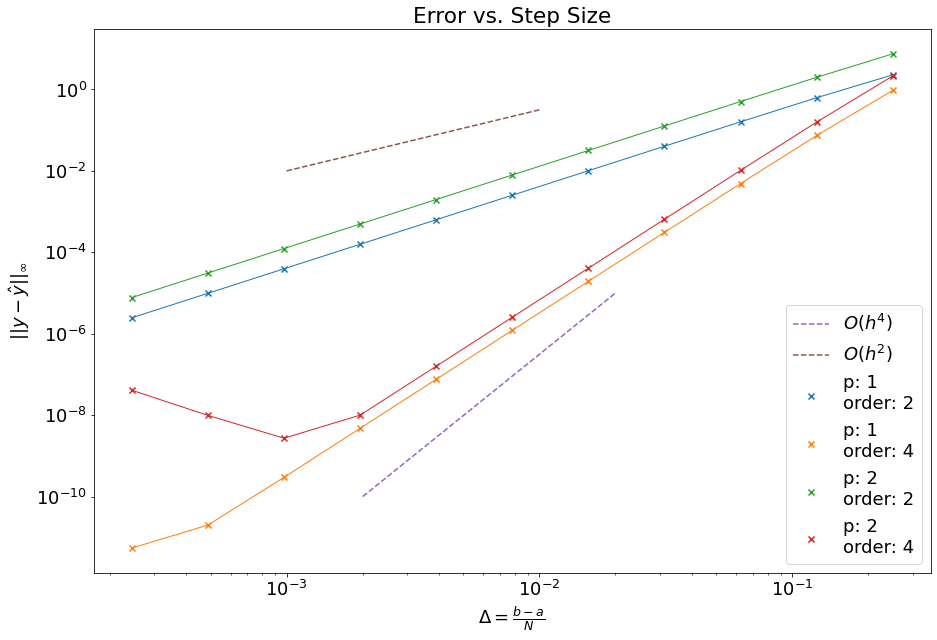

In [140]:
"""
Domain size
"""
domain_size = 2
if verbose:
    print(f"domain size: {domain_size}")

"""
Different resolutions
"""

if 1:
    # Use this to generate resolutions for all standard test runs
    N_2_start = 3
    N_2_end = 14
else:
    # Use this for debugging
    N_2_start = 3
    N_2_end = 6

N_ = np.array([2**i for i in range(N_2_start, N_2_end)])
if verbose:
    print(f"resolutions: {N_}")

"""
Corresponding node distances.
"""
h_ = domain_size/N_
if verbose:
    print(f"cell sizes: {h_}")


"""
Next, we set up different run configurations with a dictionary

USAGE:
Use "if 1" to activate the test and "if 0" to deactivate including the test.
In this way, you can step-by-step run the different configurations for debugging.
"""
test_config_ = []

if 1:
    test_config_ += [{
                'stencil_x': [-1, 1], 	# stencil coordinates
                'p':    1,          	# order of derivative to setup stencil weights
                'order':    2,      	# expected approximation order
            }]

if 1:
    test_config_ += [{
                'stencil_x': [-2, -1, 1, 2],
                'p':    1,
                'order':    4,
            }]

if 1:
    test_config_ += [{
                'stencil_x': [-1, 0, 1],
                'p':    2,
                'order':    2,
            }]

if 1:
    test_config_ += [{
                'stencil_x': [-2, -1, 0, 1, 2],
                'p':    2,
                'order':    4,
            }]



"""
Accumulator of errors to plot them later on.
"""
errors = np.zeros((len(test_config_), len(h_)))

for rci in range(len(test_config_)):
    test_config = test_config_[rci]
    if verbose:
        print("*"*80)
        print(f"test_config: {test_config}")
        print("*"*80)

    # Make dict values easier to access
    stencil_x = test_config['stencil_x']
    p = test_config['p']
    order = test_config['order']


    prev_error = None
    for Ni in range(len(N_)):

        # resolution
        N = N_[Ni]
        h = h_[Ni]
        if verbose:
            print(f" + N: {N}")
            print(f" + h: {h}")

        # Compute nodal points
        x = np.linspace(0, domain_size, N, endpoint=False)

        # Evaluate function on nodal points
        y = f(x)

        #############################################
        # Exercise a: START
        #############################################
        h = x[1]-x[0]
        stencil_x = np.array(stencil_x)
        stencil_w = get_fd_stencil(p, 0, stencil_x*h)
        
        #############################################
        # Exercise a: END
        #############################################

        if verbose:
            print(f" + stencil x: {stencil_x}")
            print(f" + stencil weights: {stencil_w}")
            print(f" + y: {y}")
        


        """
        Compute approximation and error
        """
        
        # Compute numerical approximation
        y_deriv_num = apply_fd(stencil_x, stencil_w, y)

        # Compute exact derivative
        y_deriv_exact = f(x, p)


        if verbose:
            plt.close()
            fig, ax = plt.subplots(1, 1, figsize=(4,3))

            #############################################
            # Exercise c: START
            #############################################

            plt.plot(x, y_deriv_exact, label='true derivative')
            plt.plot(x, y_deriv_num, label='numerical derivative')
            plt.legend()
            #############################################
            # Exercise c: END
            #############################################

            fig.tight_layout()
            plt.show()
            #sys.exit(1)


        # Compute error
        error = lmax(y_deriv_num, y_deriv_exact)
        if verbose:
            print(f" + error: {error}")

        errors[rci, Ni] = error

        """
        Print more information on convergence and the order
        """
        if prev_error is not None:
            conv = prev_error / error
            conv_order = np.log(conv)/np.log(2)
            if verbose:
                print(f" + measured convergence: {conv}")
                print(f" + measured convergence order: {conv_order}")

        prev_error = error
        if verbose:
            print("")



if 1:
    """
    Plotting of results
    """

    #############################################
    # Exercise f: START
    #############################################
    plt.rcParams.update({'font.size':18})
    plt.figure(figsize=(15,10))
    for i, y in enumerate(errors): 
        plt.scatter(h_, y, marker='x', label='p: '+str(test_config_[i]['p'])+'\norder: '+str(test_config_[i]['order']))
        plt.plot(h_, y, linewidth=1.)
    plt.plot([2e-3, 2e-2], [1e-10, (1e-10)**(1./2)], linestyle='--', label='$O(h^4)$')
    plt.plot([1e-3, 1e-2], [1e-2, (1e-2)**(1./4)], linestyle='--', label='$O(h^{2})$')
    
    plt.xlabel(r'$\Delta = \frac{b-a}{N}$')
    plt.ylabel(r'$||y-\hat{y}||_{\infty}$')
    plt.yscale('log')
    plt.title('Error vs. Step Size')
    plt.xscale('log')
    plt.legend()
    #############################################
    # Exercise f: END
    #############################################
